## Bike Sharing Case Study 
### Linear Regression

- Name: Abhijeet Srivastava


## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

#For changing the display 
pd.set_option('display.max_columns', 500)

## Step 1: Reading and Understanding the Data
1. Load dataset to pandas dataframe bike
2. Explore the dataframe to understand all the columns present in bike

In [2]:
#reading the data
bike = pd.read_csv(r'day.csv')

In [3]:
#Exploring the dataset to get a better understanding 
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#the shape of the df
bike.shape

(730, 16)

In [5]:
#some basic information on the bike df
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### There is a mix of categorical and numerical columns 
#### cnt is the target variable 

In [6]:
#Summary of bike df 
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#check for NA or missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There aren't any missing values!!!

In [8]:
#instant column in the dataset is for indexing, so it can be dropped
bike.drop(['instant'], axis=1, inplace=True) 

In [9]:
#verfiying the drop
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### On referring to the data dictionary provided, it can be observed that the column 'dteday' can be dropped as that data is already present in the 'yr' and 'mnth' columns.

In [10]:
bike.drop(['dteday'], axis=1, inplace=True)

#verfiying the drop
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


On further obeservation we notice that the following columns: 
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit 
all are categorical variables and need dummy values. 
And to use pd.get_dummies needs the cols to be of Object type

##### NOTE: 
- yr, holiday, workingday are already in binary format and don't need dummy values. 
- We will replace season, mnth, weekday and weathersit with values from the data dictionary 

In [11]:
#Replacing values in season col
bike.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}, inplace=True)

#verifying the replace
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#Replacing values in mnth column
bike.mnth.replace({1:'Jan',  2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
#replacing values in weekday and weathersit cols
bike.weekday.replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)
bike.weathersit.replace({1: 'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'}, inplace=True)

#verifiyng the replace
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,Spring,0,Jan,0,Sat,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,Spring,0,Jan,0,Sun,0,Mist + Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,Spring,0,Jan,0,Mon,1,Mist + Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,Spring,0,Jan,0,Tue,1,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,Spring,0,Jan,0,Wed,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


## Step 2: Data Visualisation

### Numeric Columns

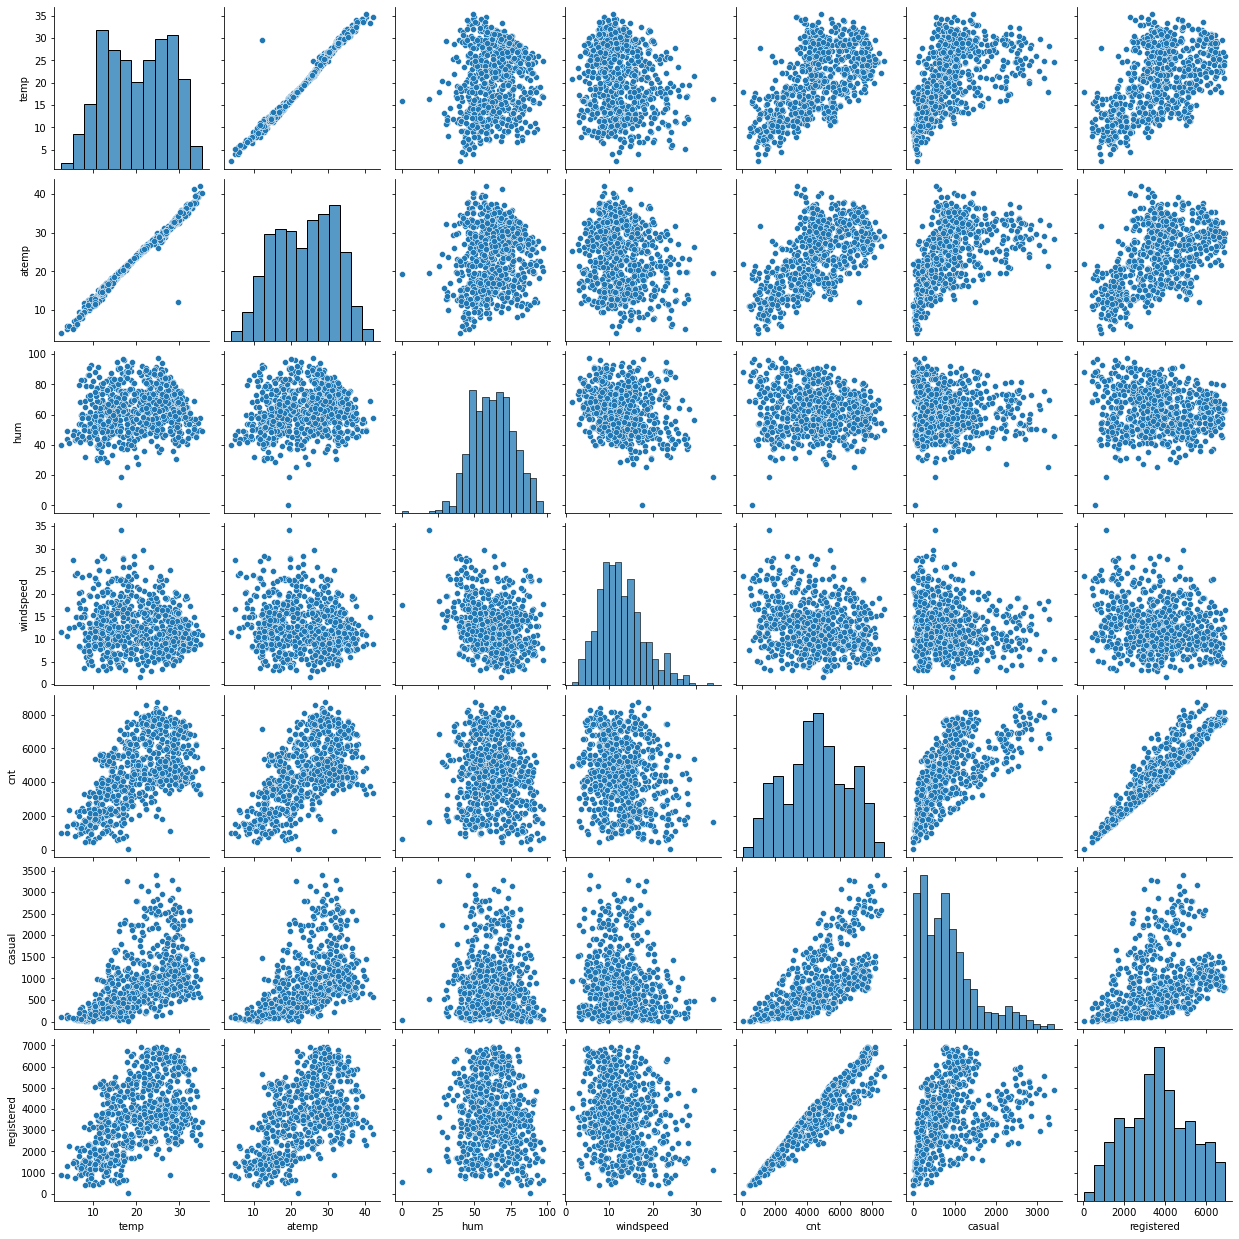

In [14]:
#Visualizing the numerical cols in a pairplot
sns.pairplot(bike, vars=['temp','atemp','hum','windspeed','cnt','casual','registered'])
plt.show()

### INSIGHTS: 
- There is a very strong correlation between temp and atemp
- Strong correlation between cnt and temp
- Strong correlation between cnt and atemp
- Good correlation between cnt and registered
- Some decent correlation between cnt and casual 

### Categorical Columns

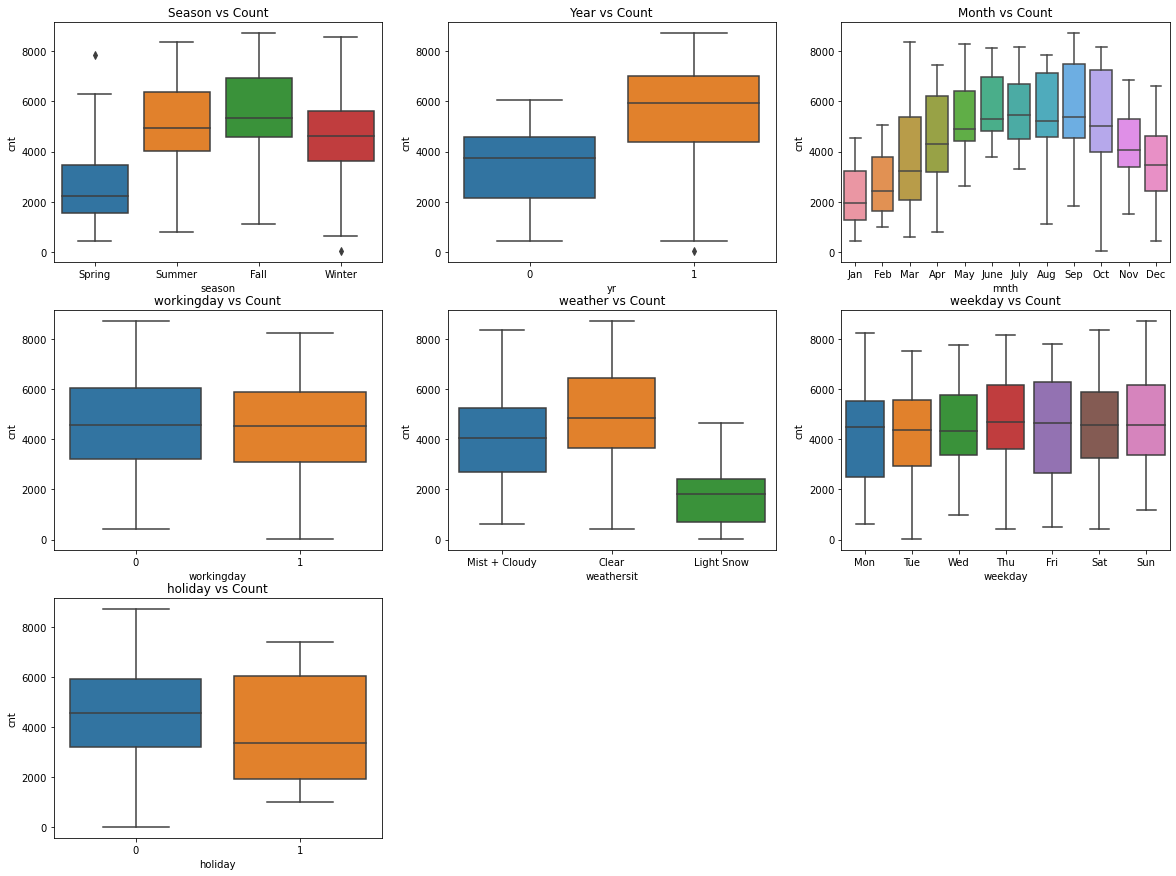

In [15]:
# plotting all categorical columns vs cnt 
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x ='season', y ='cnt', data=bike) 
plt.title("Season vs Count")

plt.subplot(3,3,2)
sns.boxplot(x ='yr', y ='cnt', data=bike)
plt.title("Year vs Count")

plt.subplot(3,3,3)
sns.boxplot(x ='mnth', y ='cnt', data=bike)
plt.title("Month vs Count")

plt.subplot(3,3,4)
sns.boxplot(x ='workingday', y ='cnt', data=bike)
plt.title("workingday vs Count")

plt.subplot(3,3,5)
sns.boxplot(x ='weathersit', y ='cnt', data =bike)
plt.title("weather vs Count")

plt.subplot(3,3,6)
sns.boxplot(x ='weekday', y ='cnt', data=bike)
plt.title("weekday vs Count")

plt.subplot(3,3,7)
sns.boxplot(x ='holiday', y ='cnt', data=bike)
plt.title("holiday vs Count")
plt.show()

### Insights:  
- Bike Rentals are:
    -  more during the Fall season and followed by summer, then winter and lastly spring
    -  more in the 2019 compared to 2018
    -  more in May through Oct and lower in the remaining months
    -  the practically the same when compared with workingday
    -  more in Clear weather, followed by mist+cloudy
    -  pratically the same over the days of the week with Monday, Thursday and Friday having the top 3 days very closely followed by the remaining days
    -  less on holidays

### Correlation between columns

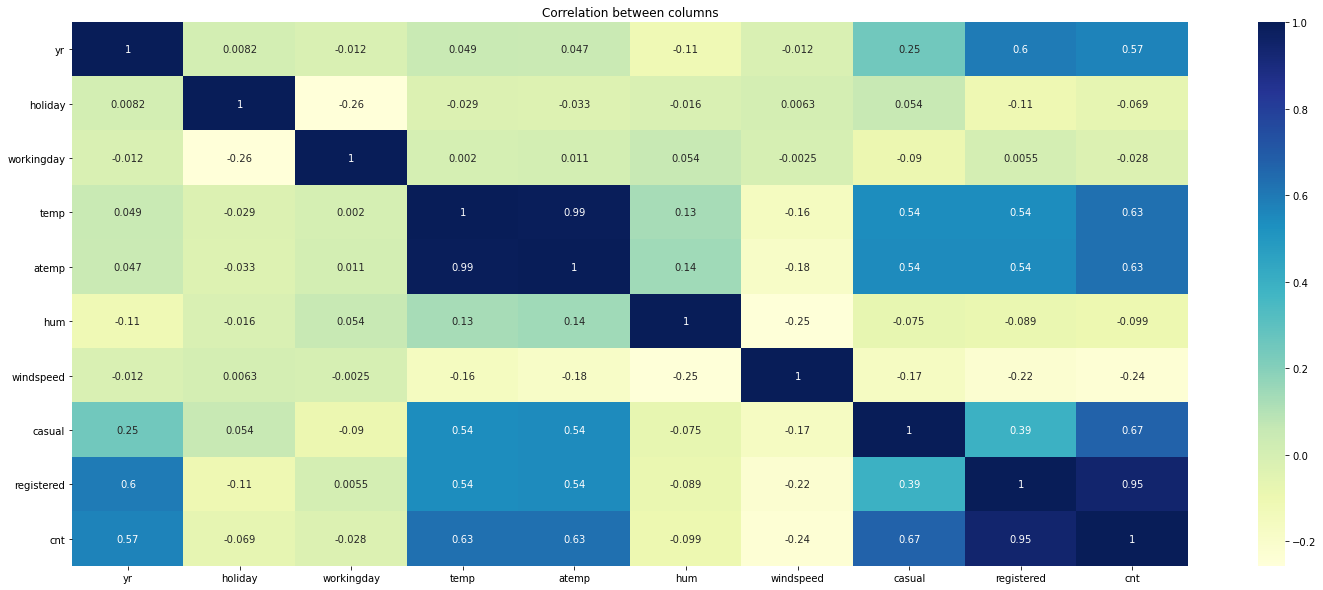

In [16]:
#Heatmap to see correlation
corr = bike.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,cmap="YlGnBu", annot=True)
plt.title("Correlation between columns")
plt.show()

### Insights:
1. temp, atemp, casual, yr and registered are strongly correlated to cnt
2. <b> BUT</b>, temp and temp have 0.99 correlation, one of them needs to be dropped
3. casual and registered  add up to the target variable 'cnt' and we know this already so on modelling, they will lead to overfitting, so they need to be dropped.

#### Dropping atemp, casual and registered columns

In [17]:
#drop unnecessary columns
bike = bike.drop(['casual','registered','atemp'], axis=1)
#verifying the drop
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [18]:
bike.shape

(730, 11)

In [19]:
bike.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## Step 3: Data Preparation

### Dummy variables
Dummy variables require the column to have dtpye as object, which is already the case for:
- mnth
- season
- weathersit
- weekday

In [20]:
#creating dummy variables for season, mnth, weekday and weathersit
season_dummy = pd.get_dummies(bike['season'], drop_first=True)
month_dummy = pd.get_dummies(bike['mnth'], drop_first=True)
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first=True)
weather_dummy = pd.get_dummies(bike['weathersit'], drop_first=True)

In [21]:
#Merging the dummy dfs to bike df
bike = pd.concat([bike,season_dummy], axis=1)
bike = pd.concat([bike,month_dummy], axis=1)
bike = pd.concat([bike,weekday_dummy], axis=1)
bike = pd.concat([bike,weather_dummy], axis=1)

#verifying
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,Spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
#dropping the orginal columns season, mnth, weekday and weathersit
bike.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)

#verifying
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
#checking the new shape
bike.shape

(730, 29)

In [24]:
#checking info of updated df
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Spring         730 non-null    uint8  
 8   Summer         730 non-null    uint8  
 9   Winter         730 non-null    uint8  
 10  Aug            730 non-null    uint8  
 11  Dec            730 non-null    uint8  
 12  Feb            730 non-null    uint8  
 13  Jan            730 non-null    uint8  
 14  July           730 non-null    uint8  
 15  June           730 non-null    uint8  
 16  Mar            730 non-null    uint8  
 17  May            730 non-null    uint8  
 18  Nov       

## Step 4: Splitting the Data into Training and Testing Sets

In [25]:
#data is prepped for train/test split
#importing the required libraries
from sklearn.model_selection import train_test_split

#using the 70-30 split
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
#printing the shapes
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


In [27]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [28]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Rescaling the features 

It is important to have all the variables on the same scale for the model to be easily interpretable. 
We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 
- There are two common ways of rescaling:
    - Min-Max scaling (Normalisation):Between 0 and 1
    - Standardisation :mean-0, sigma-1

For this case study, we will use Min-Max scaling

In [29]:
#importing
from sklearn.preprocessing import MinMaxScaler 

In [30]:
#scaling 
scaler = MinMaxScaler()

#list of numeric cols
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

#fit on train data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [31]:
#veirfying the variables after scaling
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### All the numerical cols are now between 0 and 1

### Multicollinearity

Assumes that predictors aren't correlated with each other that could affect the LR model. Checking for multicollinearity for all the variables using a heatmap

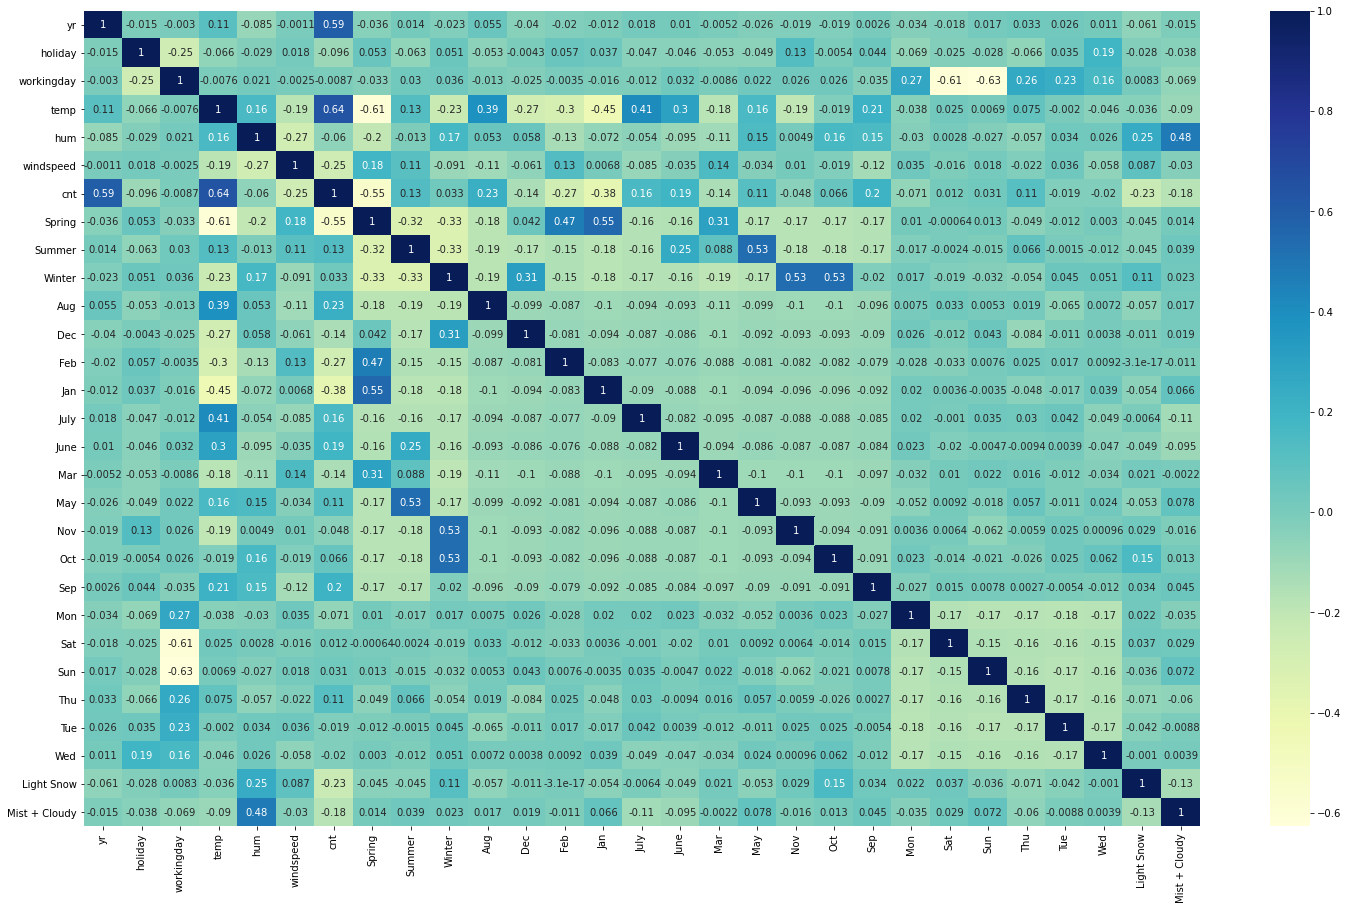

In [35]:
corr = bike_train.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.show()

### Insights from the heatmap:
- Nov, Oct are decently correlated with winter, Dec has a low correlation with Winter
- Jan, Feb  are decently correlated with Spring, Mar has a low correlation with Winter
- May and June are correlated with Summer
- July and August are decently correlated with temp
- Misty+Cloudy and Light Snow are also decently correlated with hum
- <b>NOTE:</b> with respect to cnt variable, yr, temp, hum, Spring, Aug and Sept have varying levels of correlation 

## Step 5: Building a Linear Model

### Dividing into X and Y sets for the model building

In [36]:
#Divide the train data into X and y
y_train = bike_train.pop('cnt')
X_train = bike_train

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE

### RFE: Recursive Feature Elimination

In [37]:
#Importing RFE and LR
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [38]:
#running RFE for feature selection starting with 15 variables
lm = LinearRegression()
lm.fit(X_train, y_train)
#running RFE 
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [39]:
#list of features selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [40]:
#cols where RFE support = True
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [41]:
#cols where RFE support = False
col_f = X_train.columns[~rfe.support_]
col_f

Index(['workingday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel.api
#### Model 1

In [42]:
#creating X_test df with RFE selected features 
X_train_rfe = X_train[col]

In [43]:
#adding constant variable
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,Spring,Summer,Winter,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [45]:
#running linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.34e-189
Time:                        10:38:26   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886      0.000       0.249       0.391
yr                0.2303      0.008     28.511      0.000       0.214       0.246
holiday          -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp              0.4800      0.037     12.977      0.000       0.407       0.553
hum              -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed        -0.1885      0.026     -7.312      0.000      -0.239      -0.138
Spring           -0.0617      0.021     -2.907      0.004      -0.103      -0.020
Summer            0.0408      0.015      2.659      0.008       0.011       0.071
Winter            0.1034      0.018      5.763      0.000       0.068       0.139
Dec              -0.0372      0.017     -2.131      0.034      -0.071      -0.003
Jan              -0.0437      0.018     -2.415      0.016      -0.079      -0.008
July             -0.0555      0.018     -3.046      0.002      -0.091      -0.020
Nov              -0.0409      0.019     -2.187      0.029      -0.078      -0.004
Sep               0.0749      0.017      4.438      0.000       0.042       0.108
Light Snow       -0.2481      0.026     -9.402      0.000      -0.300      -0.196
Mist + Cloudy    -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [47]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [48]:
#import
from statsmodels.stats.outliers_influence import variance_inflation_factor
#df that will contain names of all feature variables 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.81
14,Mist + Cloudy,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


#### `Dec` is insignificant (as it is has a high p value and low VIF) in presence of other variables and can be dropped 

In [49]:
X_train_new = X_train_rfe.drop(["Dec"], axis=1)

### Model 2 without `Dec`

In [50]:
X_train_lm2 = sm.add_constant(X_train_new)

In [51]:
lm2 = sm.OLS(y_train, X_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.25e-189
Time:                        10:39:57   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3030      0.035      8.597      0.000       0.234       0.372
yr                0.2301      0.008     28.386      0.000       0.214       0.246
holiday          -0.0922      0.026     -3.592      0.000      -0.143      -0.042
temp              0.5052      0.035     14.369      0.000       0.436       0.574
hum              -0.1682      0.038     -4.457      0.000      -0.242      -0.094
windspeed        -0.1854      0.026     -7.179      0.000      -0.236      -0.135
Spring           -0.0564      0.021     -2.664      0.008      -0.098      -0.015
Summer            0.0466      0.015      3.080      0.002       0.017       0.076
Winter            0.0986      0.018      5.519      0.000       0.064       0.134
Jan              -0.0339      0.018     -1.929      0.054      -0.068       0.001
July             -0.0562      0.018     -3.076      0.002      -0.092      -0.020
Nov              -0.0253      0.017     -1.463      0.144      -0.059       0.009
Sep               0.0798      0.017      4.755      0.000       0.047       0.113
Light Snow       -0.2418      0.026     -9.187      0.000      -0.293      -0.190
Mist + Cloudy    -0.0543      0.010     -5.182      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       60.875   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.686
Skew:                          -0.640   Prob(JB):                     2.82e-31
Kurtosis:                       5.233   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_train_lm2 = X_train_lm2.drop(["const"], axis=1)

In [53]:
#vif
vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,Spring,4.37
7,Winter,3.78
6,Summer,2.79
13,Mist + Cloudy,2.29
0,yr,2.09
8,Jan,1.67
9,July,1.59


#### Dropping `Jan` as it is insignificant (high p value and low VIF) 

In [54]:
X_train_new2 = X_train_new.drop(['Jan'], axis=1)

### Model 3 without `Jan`

In [55]:
#rebuilding model
X_train_lm3 = sm.add_constant(X_train_new2)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          9.74e-190
Time:                        10:41:28   Log-Likelihood:                 510.48
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     496   BIC:                            -933.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2909      0.035      8.365      0.000       0.223       0.359
yr                0.2294      0.008     28.249      0.000       0.213       0.245
holiday          -0.0930      0.026     -3.613      0.000      -0.144      -0.042
temp              0.5233      0.034     15.398      0.000       0.457       0.590
hum              -0.1727      0.038     -4.573      0.000      -0.247      -0.099
windspeed        -0.1802      0.026     -6.996      0.000      -0.231      -0.130
Spring           -0.0608      0.021     -2.879      0.004      -0.102      -0.019
Summer            0.0497      0.015      3.289      0.001       0.020       0.079
Winter            0.1042      0.018      5.892      0.000       0.069       0.139
July             -0.0579      0.018     -3.160      0.002      -0.094      -0.022
Nov              -0.0242      0.017     -1.398      0.163      -0.058       0.010
Sep               0.0805      0.017      4.784      0.000       0.047       0.114
Light Snow       -0.2394      0.026     -9.081      0.000      -0.291      -0.188
Mist + Cloudy    -0.0543      0.011     -5.173      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       59.527   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.666
Skew:                          -0.624   Prob(JB):                     7.75e-31
Kurtosis:                       5.229   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#dropping const
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)
#VIF
vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.13
2,temp,16.11
4,windspeed,4.71
5,Spring,4.04
7,Winter,3.75
6,Summer,2.78
12,Mist + Cloudy,2.29
0,yr,2.08
9,Nov,1.59
8,July,1.58


#### `Nov` variable can be dropped as p value is extremely high

In [57]:
#dropping 
X_train_new3 = X_train_new2.drop(['Nov'], axis=1)

### Model 4 without `Nov`

In [58]:
#rebuilding model
X_train_lm4 = sm.add_constant(X_train_new3)
lm4 = sm.OLS(y_train, X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.69e-190
Time:                        10:42:24   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2841      0.034      8.242      0.000       0.216       0.352
yr                0.2293      0.008     28.219      0.000       0.213       0.245
holiday          -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp              0.5300      0.034     15.739      0.000       0.464       0.596
hum              -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed        -0.1819      0.026     -7.066      0.000      -0.233      -0.131
Spring           -0.0562      0.021     -2.695      0.007      -0.097      -0.015
Summer            0.0519      0.015      3.457      0.001       0.022       0.081
Winter            0.0987      0.017      5.719      0.000       0.065       0.133
July             -0.0575      0.018     -3.140      0.002      -0.094      -0.022
Sep               0.0830      0.017      4.962      0.000       0.050       0.116
Light Snow       -0.2382      0.026     -9.034      0.000      -0.290      -0.186
Mist + Cloudy    -0.0542      0.011     -5.151      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#dropping const
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)
#VIF
vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,Spring,4.01
7,Winter,3.35
6,Summer,2.78
11,Mist + Cloudy,2.28
0,yr,2.08
8,July,1.58
9,Sep,1.38


#### `hum` has a very high VIF, can be dropped

In [60]:
X_train_new3 = X_train_new3.drop(['hum'], axis=1)

### Model 5: without `hum`

In [61]:
#rebuilding without hum
X_train_lm5 = sm.add_constant(X_train_new3)
lm5 = sm.OLS(y_train, X_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.40e-187
Time:                        10:43:42   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1996      0.030      6.758      0.000       0.142       0.258
yr                0.2335      0.008     28.361      0.000       0.217       0.250
holiday          -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp              0.4915      0.033     14.798      0.000       0.426       0.557
windspeed        -0.1480      0.025     -5.893      0.000      -0.197      -0.099
Spring           -0.0669      0.021     -3.167      0.002      -0.108      -0.025
Summer            0.0453      0.015      2.971      0.003       0.015       0.075
Winter            0.0831      0.017      4.818      0.000       0.049       0.117
July             -0.0524      0.019     -2.811      0.005      -0.089      -0.016
Sep               0.0767      0.017      4.511      0.000       0.043       0.110
Light Snow       -0.2852      0.025    -11.536      0.000      -0.334      -0.237
Mist + Cloudy    -0.0816      0.009     -9.301      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#dropping const
X_train_lm5 = X_train_lm5.drop(['const'], axis=1)
#VIF
vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,Summer,2.21
4,Spring,2.08
0,yr,2.07
6,Winter,1.79
7,July,1.58
10,Mist + Cloudy,1.55
8,Sep,1.34
9,Light Snow,1.08


#### `windspeed` can be dropped as VIF is high

In [63]:
X_train_new4 = X_train_new3.drop(['windspeed'], axis=1)

### Model 6 without `windspeed`

In [64]:
#rebuilding without windspeed
X_train_lm6 = sm.add_constant(X_train_new4)
lm6 = sm.OLS(y_train, X_train_lm6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.80e-181
Time:                        10:45:09   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1503      0.029      5.134      0.000       0.093       0.208
yr                0.2325      0.009     27.340      0.000       0.216       0.249
holiday          -0.1008      0.027     -3.744      0.000      -0.154      -0.048
temp              0.5034      0.034     14.697      0.000       0.436       0.571
Spring           -0.0764      0.022     -3.506      0.000      -0.119      -0.034
Summer            0.0355      0.016      2.265      0.024       0.005       0.066
Winter            0.0842      0.018      4.726      0.000       0.049       0.119
July             -0.0527      0.019     -2.735      0.006      -0.091      -0.015
Sep               0.0810      0.018      4.617      0.000       0.047       0.116
Light Snow       -0.2999      0.025    -11.803      0.000      -0.350      -0.250
Mist + Cloudy    -0.0798      0.009     -8.816      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       67.048   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.363
Skew:                          -0.677   Prob(JB):                     7.49e-37
Kurtosis:                       5.449   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#dropping const
X_train_lm6 = X_train_lm6.drop(['const'], axis=1)
#VIF
vif = pd.DataFrame()
X = X_train_lm6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
4,Summer,1.93
5,Winter,1.58
6,July,1.58
9,Mist + Cloudy,1.55
3,Spring,1.40
7,Sep,1.34
8,Light Snow,1.07
1,holiday,1.04


#### This last model has VIF and p value within acceptable range and a decent adjusted R sqaure of 0.821. We can now try making our predictions using Model 6.

Model 6 has all the cols from RFE support except for:
1. Dec
2. Jan
3. Nov
4. hum
5. windspeed

## Step 6: Residual Analysis of the train data

#### Let's check the assumptions of Linear Regression

In [66]:
X_train_lm6 = sm.add_constant(X_train_lm6)

In [67]:
y_train_pred = lm6.predict(X_train_lm6)

<Figure size 432x288 with 0 Axes>

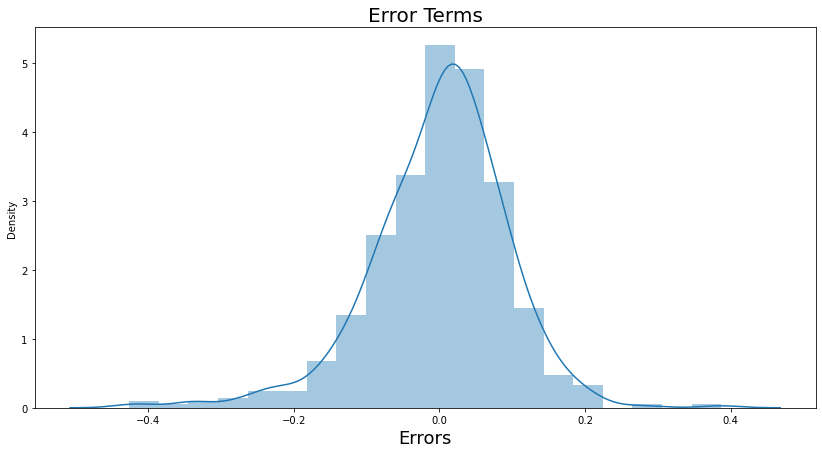

In [68]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)

plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

#### Error terms are normally distributed

## Step 7: Making Predictions

Applying the MinMax scaling to the test sets as well

In [69]:
#list of num cols
num_vars=['temp','hum','windspeed','cnt']

#scaling
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
# X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [71]:
#verifying that the scaling is correct
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
X_train_lm6.columns

Index(['const', 'yr', 'holiday', 'temp', 'Spring', 'Summer', 'Winter', 'July',
       'Sep', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [73]:
X_train_lm6 = X_train_lm6.drop(['const'], axis=1)

In [74]:
X_train_lm6.columns

Index(['yr', 'holiday', 'temp', 'Spring', 'Summer', 'Winter', 'July', 'Sep',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [75]:
#Prediction time, setting up the X_test to correct format with the 
#necessary columns and constant variable 
X_test_new = X_test[X_train_lm6.columns]

#adding constant variable
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,holiday,temp,Spring,Summer,Winter,July,Sep,Light Snow,Mist + Cloudy
184,1.0,0,1,0.831783,0,0,0,1,0,0,1
535,1.0,1,0,0.901354,0,1,0,0,0,0,0
299,1.0,0,0,0.511964,0,0,1,0,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,1,0,0,0,0,0


In [76]:
#Predictionn
y_pred = lm6.predict(X_test_new)

### R-square and Adjusted R-sqaure for test

In [77]:
#import
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8089780460935858

$ Adjusted  r-square = {1} - \frac{(1 - {R}^2)(N-1)}{N-p-1} $

where N is the sample size, p = number of variables/features 

In [78]:
adj_r2 = 1 - ((1-r2)*(10-1)/(10-1-1))
adj_r2

0.785100301855284

#### R-square: 0.7658569964401059 
#### adjusted R-square: 0.7365891209951191

## Step 8: Model Evaluation

Lets plot y_test and y_pred to understand the spread.

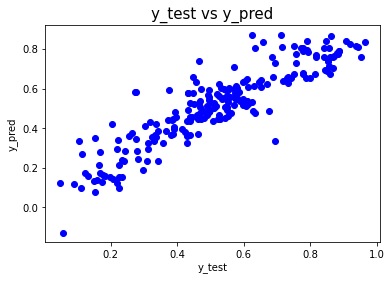

In [79]:
plt.scatter(y_test,y_pred,color='blue')

plt.title('y_test vs y_pred', fontsize=15)      
plt.xlabel('y_test', fontsize=10)                       
plt.ylabel('y_pred', fontsize=10)     

plt.show()

#### Visualizng the fit

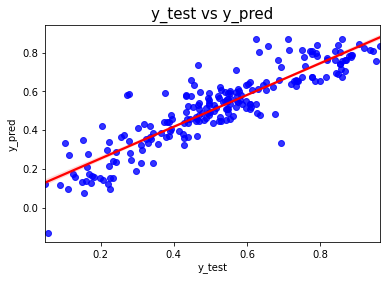

In [80]:
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, scatter_kws={"color":"blue"}, line_kws={"color":"red"})

plt.title('y_test vs y_pred', fontsize=15)              
plt.xlabel('y_test', fontsize=10)                          
plt.ylabel('y_pred', fontsize=10)                      
plt.show()

Equation for the best fit line:

$ count= 0.2325\times yr - 0.1008\times holiday + 0.5034 \times temp - 0.0764 \times Spring + 0.0355 \times Summer + 0.0842 \times Winter - 0.0527 \times July + 0.0810 \times Sep - 0.2999 \times Light Snow -0.0798 \times Mist Cloudy $

### Comparing R-sqaure values for train and test

- Train
    - R-squared:                       0.824
    - Adj. R-squared:                  0.821
- Test 
    - R-squared:                       0.809
    - Adj. R-sqaured:                  0.785

In [81]:
def per_change(x,y):
    try:
        return (abs(x-y)/y)*100.0
    except ZeroDivisionError:
        return 0

In [82]:
print("Difference in R-squared for Train and Test: ", per_change(0.809,0.824))
print("Difference in adj. R-squared for Train and Test: ", per_change(0.785,0.821))

Difference in R-squared for Train and Test:  1.8203883495145512
Difference in adj. R-squared for Train and Test:  4.38489646772228


#### Difference is less than 5% so we can conclude that this is the best fit model

## Conclusions and Business Goals
### Conclusions:

The bike sharing company wanted  to understand the factors(independent variables) affecting the demand of their bikes in the American market. So accordingly, the model was built and the best fit line describing the demand is as follows:

$ count= 0.2325\times yr - 0.1008\times holiday + 0.5034 \times temp - 0.0764 \times Spring + 0.0355 \times Summer + 0.0842 \times Winter - 0.0527 \times July + 0.0810 \times Sep - 0.2999 \times Light Snow -0.0798 \times Mist Cloudy $

This model shows the following:

1. temperature is a very strong variable as its coefficient (0.5034) is very high, implying that an increase of 1 unit in temp could lead to an increase in demand by 0.5034
2. year is a strong variable as its coefficient (0.2325) implies that an increase of 1 unit in year leads to an increase in demand by 0.2325
3. Light snow weather drops demand as seen by its coefficient (-0.2999). So an increase in Light snow of 1 unit leads to a decrease in demand by 0.2999
4. Holidays also drop demand as seen by its coefficient (-0.1008). An increase in holidays of 1 unit leads to a decrease in demand by 0.1008
5. Since the demand is the same throughout the week and lower on holidays, it may be possible that a decent majority of the demand is for using the bikes on work days. 

### Business Goals:

Management should focus more on the following points/features to manipulate the business strategy to meet the demand levels and meet the customer's expectations:
1. Based on the weather forecast run promos the days the temperatures are higher (i.e. during non Winter months)
2. Run promos during the week and not on holidays
